In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import matplotlib
from matplotlib import colors,colorbar
import matplotlib
%matplotlib inline
import csv 
import math
from math import radians, cos, sin, asin, sqrt
import cPickle


In [3]:
cellsize = 1
num_lons = 360/cellsize
num_lats = 180/cellsize

In [4]:
def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles
    return c * r

def distance_between_boxes(lat_box_0,lon_box_0,lat_box_1,lon_box_1):
    lat1 = lat_box_0*cellsize-90+cellsize/2.
    lat2 = lat_box_1*cellsize-90+cellsize/2.
    lon1 = lon_box_0*cellsize-180+cellsize/2.
    lon2 = lon_box_1*cellsize-180+cellsize/2.
    return haversine(lon1, lat1, lon2, lat2)



In [28]:
x = [[1,1],[1,1]]
set(x)

TypeError: unhashable type: 'list'

In [16]:
max(1,0)
lat_box = 90
satellite_radius = 1000
111*math.sin(2*3.14/360*lat_box*cellsize)
num_lats_to_count = satellite_radius /(111*math.sin(2*3.14/360*lat_box*cellsize))+ 2
l_start = max(lat_box - num_lats_to_count, 0)
l_end = min(lat_box + num_lats_to_count, num_lats -1)
l_start, l_end

(78.99098813452012, 101.00901186547988)

In [41]:

def make_grid_average(satellite_radius):
    g_for_average = [ [[] for i in range(num_lons)] for k in range(num_lats)]
    g_for_average5 = [ [[] for i in range(num_lons)] for k in range(num_lats)]
    # g_for_average[lat_box][lon_box] -- a list of the other values we should average across
    for lat_box in range(num_lats):
        for lon_box in range(num_lons):
            num_lats_to_count = satellite_radius / 111. + 2 
            lt_start = int(max(lat_box - num_lats_to_count, 0))
            lt_end = int(min(lat_box + num_lats_to_count, num_lats -1))
            num_lons_to_count = satellite_radius / (111*math.sin(2*3.14/360*lat_box*cellsize)+.01)+ 2
            ln_start = int(max(lon_box - num_lons_to_count, 0))
            ln_end = int(min(lon_box + num_lons_to_count, num_lats -1))  
            g_for_average = []
            for i in range (lt_start,lt_end):
                for k in range (ln_start,ln_end):
                    dist = distance_between_boxes(i,k,lat_box,lon_box)
                    if dist < satellite_radius:
#                         scale_factor = (2*satellite_radius - dist)/(2*satellite_radius) 
                        # we want this to be 0 2*satellite_radius and 1 at the satellite_radius
                        g_for_average.append([i,k])
            five_degree_grid = []
            for g in g_for_average:
                lat_bin_5 = g[0]/5
                lon_bin_5 = g[1]/5
                if [lat_bin_5,lon_bin_5] not in five_degree_grid:
                    five_degree_grid.append([lat_bin_5,lon_bin_5])
            g_for_average5[lat_box][lon_box] = five_degree_grid
    return g_for_average5


In [42]:
satellite_radius = 2778 # km
grid_for_average = make_grid_average(satellite_radius)
np.array(grid_for_average).dump(open('../../data/density/grid_for_average_1degree.npy', 'wb'))

In [44]:
grid_for_average[90][180]

[[13, 34],
 [13, 35],
 [13, 33],
 [14, 33],
 [14, 34],
 [14, 35],
 [14, 32],
 [15, 32],
 [15, 33],
 [15, 34],
 [15, 35],
 [15, 31],
 [16, 31],
 [16, 32],
 [16, 33],
 [16, 34],
 [16, 35],
 [17, 31],
 [17, 32],
 [17, 33],
 [17, 34],
 [17, 35],
 [18, 31],
 [18, 32],
 [18, 33],
 [18, 34],
 [18, 35],
 [19, 31],
 [19, 32],
 [19, 33],
 [19, 34],
 [19, 35],
 [20, 31],
 [20, 32],
 [20, 33],
 [20, 34],
 [20, 35],
 [21, 32],
 [21, 33],
 [21, 34],
 [21, 35],
 [22, 33],
 [22, 34],
 [22, 35]]

In [43]:
print len(grid_for_average[89][90])
print (4*satellite_radius/200)**2
for g in grid_for_average[89][90]:
    if g[0]==80:
        print 2*g[1]-180,200*abs(90-g[1]),g[2]

4485
3025
-180 18000 0.599730285657
-178 17800 0.599741890455
-176 17600 0.599776692645
-174 17400 0.599834655624
-172 17200 0.599915718408
-170 17000 0.600019795671
-168 16800 0.600146777793
-166 16600 0.600296530924
-164 16400 0.600468897068
-162 16200 0.600663694171
-160 16000 0.600880716231
-158 15800 0.601119733425
-156 15600 0.601380492245
-154 15400 0.601662715657
-152 15200 0.601966103265
-150 15000 0.602290331505
-148 14800 0.602635053846
-146 14600 0.602999901009
-144 14400 0.603384481208
-142 14200 0.603788380405
-140 14000 0.604211162579
-138 13800 0.604652370026
-136 13600 0.605111523667
-134 13400 0.605588123374
-132 13200 0.606081648332
-130 13000 0.606591557401
-128 12800 0.607117289512
-126 12600 0.607658264083
-124 12400 0.608213881453
-122 12200 0.608783523342
-120 12000 0.609366553334
-118 11800 0.609962317384
-116 11600 0.610570144345
-114 11400 0.61118934653
-112 11200 0.611819220284
-110 11000 0.612459046599
-108 10800 0.613108091741
-106 10600 0.613765607915
-10

In [13]:
satellite_radius = 2000 # km
grid_for_average_2000 = make_grid_average(satellite_radius)
np.array(grid_for_average_2000).dump(open('../../data/density/grid_for_average_2degree_2000.npy', 'wb'))

In [14]:
satellite_radius = 1500 # km
grid_for_average_1500 = make_grid_average(satellite_radius)
np.array(grid_for_average_1500).dump(open('../../data/density/grid_for_average_2degree_1500.npy', 'wb'))

In [10]:
satellite_radius = 1000 # km
grid_for_average_1000 = make_grid_average(satellite_radius)
np.array(grid_for_average_1000).dump(open('../../data/density/grid_for_average_2degree_1000.npy', 'wb'))

In [11]:
satellite_radius = 500 # km
grid_for_average_500 = make_grid_average(satellite_radius)
np.array(grid_for_average_500).dump(open('../../data/density/grid_for_average_2degree_500.npy', 'wb'))

In [6]:
def get_area(lat):
    lat_degree = 69 #miles
    # Convert latitude and longitude to 
    # spherical coordinates in radians.
    degrees_to_radians = math.pi/180.0        
    # phi = 90 - latitude
    phi = (lat+.05)*degrees_to_radians #plus 0.5 to get the middle
    lon_degree = math.cos(phi)*69 #miles
    # return 69*69*2.6
    return  lat_degree*lon_degree* 2.58999 #miles to square km

In [7]:
sourcedir = "../../data/density/"
filename = "density_2015.csv"


vessel_days = np.zeros(shape=(num_lats,num_lons)) #2 degree by 2 degree grid

with open(sourcedir + filename,'rU') as f:
    reader = csv.DictReader(f, delimiter=',')
    for row in reader:
        lat = int(row['lat_bin'])
        lon = int(row['lon_bin'])
        if lat<900 and lat>-900 and lon>-1800 and lon<1800:
            lat_index = (lat+900)/(cellsize*10)
            lon_index = (lon+1800)/(cellsize*10)
            days = int(row['number'])
            #area = get_area(lat/10) # area of 1 by 1 degree at a given lat
            vessel_days[lat_index][lon_index] += days/365. # vessels per 5x5 grid per day 
            # alternate math to get the amount per square km: (365* area*.1*.1)  #vessels per day per km



In [8]:
averages = np.zeros(shape=(num_lats,num_lons)) # 2 by 2 grid

for i in range(num_lats):
    for j in range(num_lons):
        count = len(grid_for_average[i][j])
        total = 0
        for item in grid_for_average[i][j]:
            total += vessel_days[item[0]][item[1]]*item[2]
        averages[i][j]=total/4. 
        # divide by 4 because the satellite sees only 1/4 of the area that we're 
        #averaging over
            
        


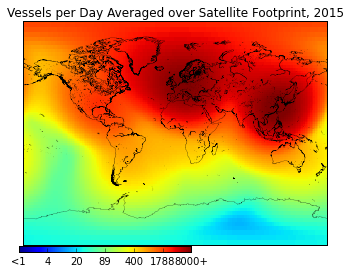

In [9]:
tm = 1000. #this is just to scale the the following... this makes the colormap



colors = [["#FFFFFF",0,0],
          ['#894081', 5,5],
          ['#338ACA',10,10],
          ['#47AEC4',25,25],
          ['#49A578',50,50],
          ['#82B130',100,100],
          ['#F8C728',250,250],
          ['#EFA639',500,500],
          ['#E58230',1000,1000]]
                    
          
          
cdict = { 'red':tuple(   (color[2]/tm, int(color[0][1:3],16)/256.0, int(color[0][1:3],16)/256.0) for color in colors ),
          'green':tuple( (color[2]/tm, int(color[0][3:5],16)/256.0, int(color[0][3:5],16)/256.0) for color in colors ),
          'blue':tuple(  (color[2]/tm, int(color[0][5:7],16)/256.0, int(color[0][5:7],16)/256.0) for color in colors )}


tm = 1000.


cdict2 = { 'red':tuple(   (color[2]/tm, int(color[0][1:3],16)/256.0, int(color[0][1:3],16)/256.0) for color in colors ),
          'green':tuple( (color[2]/tm, int(color[0][3:5],16)/256.0, int(color[0][3:5],16)/256.0) for color in colors ),
          'blue':tuple(  (color[2]/tm, int(color[0][5:7],16)/256.0, int(color[0][5:7],16)/256.0) for color in colors )}#,
          #'alpha': ((0,0,0),(.00001,1,1),(1,1,1)) }



'''#I left the following in just to show the format of the colormap -- it is a series of tuples
cdict = {'red': ((0.0, 0.0, 0.0),
                  (0.5, 1.0, 0.7),
                  (1.0, 1.0, 1.0)),
          'green': ((0.0, 0.0, 0.0),
                    (0.5, 1.0, 0.0),
                    (1.0, 1.0, 1.0)),
          'blue': ((0.0, 0.0, 0.0),
                   (0.5, 1.0, 0.0),
                   (1.0, 0.5, 1.0))}
'''
my_cmap = matplotlib.colors.LinearSegmentedColormap('my_colormap',cdict,256)
my_cmap.set_bad(alpha = 0.0)
    
my_cmap2 = matplotlib.colors.LinearSegmentedColormap('my_colormap',cdict2,256)
my_cmap2.set_bad(alpha = 0.0)  

firstlat = 90
lastlat = -90
firstlon = -180
lastlon = 180
scale = cellsize

numlats = int((firstlat-lastlat)/scale+.5)
numlons = int((lastlon-firstlon)/scale+.5)
    
lat_boxes = np.linspace(lastlat,firstlat,num=numlats,endpoint=False)
lon_boxes = np.linspace(firstlon,lastlon,num=numlons,endpoint=False)

fig = plt.figure()

m = Basemap(llcrnrlat=lastlat, urcrnrlat=firstlat,
          llcrnrlon=firstlon, urcrnrlon=lastlon, lat_ts=0, projection='mill',resolution="h")

m.drawmapboundary()
m.drawcoastlines(linewidth=.2)
#m.fillcontinents('#555555')#, lake_color, ax, zorder, alpha)


x = np.linspace(-180, 180, 360/cellsize )
y = np.linspace(lastlat, firstlat, (firstlat-lastlat)/cellsize)
x, y = np.meshgrid(x, y)
converted_x, converted_y = m(x, y)
from matplotlib import colors,colorbar

norm = colors.LogNorm(vmin=1, vmax=1000)

m3 = 20

m.pcolormesh(converted_x, converted_y, averages, norm=norm, vmin=1, vmax=m3**3)

t = "Vessels per Day Averaged over Satellite Footprint, 2015"
plt.title(t)

# cbar = fig.colorbar(im)#, ticks=[-1, 0, 1])
# theticks = [i*100 for i in range(10)]
# cbar = fig.colorbar(im, cmap =my_cmap2, orientation='horizontal')

ax = fig.add_axes([0.15, 0.1, 0.4, 0.02]) #x coordinate , 
#ax.patch.set_alpha(0.0)
#ax.axis('off')
# my_cmap=choose_cmap('reds')
norm = colors.Normalize(vmin=0, vmax=1000)
norm = colors.LogNorm(vmin=1, vmax=1000)
lvls = np.logspace(0,3,7)

cb = colorbar.ColorbarBase(ax,norm = norm,
#                                     ticks=theticks,
                                   orientation='horizontal', ticks=lvls)

cb.ax.set_xticklabels(["<1" ,int(m3**.5), m3, int(m3**1.5), m3*m3,int(m3**2.5), str(int(m3**3))+"+"], fontsize=10)
#cb.set_label('Vessels per Day Averaged Over Satellite Footprint',labelpad=-40, y=0.45)

# plt.text(1.1, .15, 'Pixels with fewer than 20 boats per\nday in 2014 are shown in gray', fontsize = 10)
# plt.axis('off')



plt.savefig("satellite_footprint2by2.png",bbox_inches='tight',dpi=450,transparent=True,pad_inches=0)

plt.rcParams["figure.figsize"] = [12,8]

plt.show()

#plt.clf()

In [12]:
np.array(grid_for_average).dump(open('../../data/density/grid_for_average_2degree.npy', 'wb'))


In [11]:
f = open("../../data/density/average_satellite_density.csv", "w")
for lat_bin in range(num_lats):
    for lon_bin in range(num_lons):
        f.write(str(lat_bin)+","+str(lon_bin)+","+str(averages[lat_bin][lon_bin])+"\n")
f.close()